<a href="https://colab.research.google.com/github/cloudmrhub/tess-tools/blob/main/tess_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!! pip install git+https://github.com/cloudmrhub/tess-tools

['Collecting git+https://github.com/cloudmrhub/tess-tools',
 '  Cloning https://github.com/cloudmrhub/tess-tools to /tmp/pip-req-build-qxl5e5qm',
 '  Running command git clone --filter=blob:none --quiet https://github.com/cloudmrhub/tess-tools /tmp/pip-req-build-qxl5e5qm',
 '  Resolved https://github.com/cloudmrhub/tess-tools to commit 05bfa4c18adb84d3e72c80138dbbd205cc62dcdb',
 '  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone',
 'Collecting pynico_eros_montin@ git+https://github.com/erosmontin/pynico.git (from tess==2.0.0.5)',
 '  Cloning https://github.com/erosmontin/pynico.git to /tmp/pip-install-w9zko77i/pynico-eros-montin_9f0d21ea2b5e42efbe241398bb7ad8fb',
 '  Running command git clone --filter=blob:none --quiet https://github.com/erosmontin/pynico.git /tmp/pip-install-w9zko77i/pynico-eros-montin_9f0d21ea2b5e42efbe241398bb7ad8fb',
 ' 

In [ ]:
# download the data
DIR='./'
import urllib.request
for a in  ["C","K","Q","R","SAR","TInitial","W"]:
  THATFILE=f"https://tess-testdata.s3.us-east-1.amazonaws.com/hugo2mm/{a}.nii.gz"
  urllib.request.urlretrieve(THATFILE, f"{a}.nii.gz")





Using executable /usr/local/lib/python3.12/dist-packages/tess/bin/cpptemperature
{'when': '10/09/2025, 21:08:18', 'what': {'what': 'Tess'}, 'type': 'start', 'settings': {'author': 'Eros Montin', 'mail': 'eros.montin@gmail.com', 'motto': 'Forty-six and two are just ahead of me'}, 'version': 'v0.0v'}
{'when': '10/09/2025, 21:08:18', 'what': 'Space set from ./R.nii.gz', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 21:08:19', 'what': 'Space set to 310x178x162', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 21:08:19', 'what': 'Space set to 0.002x0.002x0.002', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 21:08:19', 'what': 'T0V set to 8939160', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 21:10:02', 'what': 'Temperature calculation started /usr/local/lib/python3.12/dist-packages/tess/bin/cpptemperature /tmp/Parameter.dat', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 21:12:56', 'what': 'Temperature calculated', 't

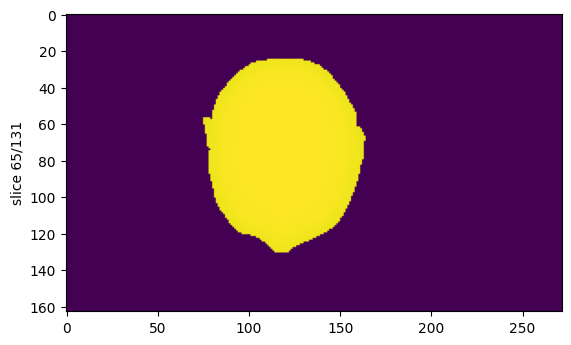

'FinalTemperature.nii.gz'

In [ ]:
import tess.tess as t
A=t.Tess()
import os

A.setHeatingTime(100)
A.setBloodPerfusionMap(os.path.join(DIR,'W.nii.gz'))
A.setMaterialDensityMap(os.path.join(DIR,'R.nii.gz'))
A.setSpace(os.path.join(DIR,'R.nii.gz'))

A.setHeatCapacityMap(os.path.join(DIR,'C.nii.gz'))
A.setSARMap(os.path.join(DIR,'SAR.nii.gz'))
A.setThermalConductivityMap(os.path.join(DIR,'K.nii.gz'))
A.setMetabolismHeatMap(os.path.join(DIR,'Q.nii.gz'))
A.setTOldMap(os.path.join(DIR,'TInitial.nii.gz'))
# set blood parameters
A.setBloodParameters(d={'capacity':1057,'density':3600,'temperature':310})
# set air parameters
A.setAirParameters(d={'capacity':1006,'density':1.3,'temperature':296,'metabolism':1006,'conductivity':0.026,'perfusion':0})

O=A.getOutput('/tmp/a.nii')
A.log.printWhatHappened()
print(A.params)
O.viewAxial()
O.writeImageAs("FinalTemperature.nii.gz")

Using executable /usr/local/lib/python3.12/dist-packages/tess/bin/cpptemperature
{'when': '10/09/2025, 20:11:40', 'what': {'what': 'Tess'}, 'type': 'start', 'settings': {'author': 'Eros Montin', 'mail': 'eros.montin@gmail.com', 'motto': 'Forty-six and two are just ahead of me'}, 'version': 'v0.0v'}
{'when': '10/09/2025, 20:11:40', 'what': 'Space set from ./R.nii.gz', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 20:11:40', 'what': 'Space set to 310x178x162', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 20:11:40', 'what': 'Space set to 0.002x0.002x0.002', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 20:11:40', 'what': 'T0V set to 8939160', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 20:13:23', 'what': 'Temperature calculation started /usr/local/lib/python3.12/dist-packages/tess/bin/cpptemperature /tmp/Parameter.dat', 'type': 'procedure', 'settings': None}
{'when': '10/09/2025, 20:17:15', 'what': 'Temperature calculated', 't

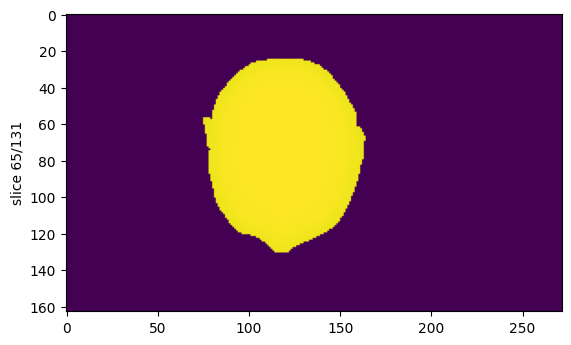

'FinalTemperature.nii.gz'

In [ ]:
import tess.tess as t
A=t.Tess()
import os

A.setSpace(os.path.join(DIR,'R.nii.gz'))
A.setHeatingTime(100)
A.setBloodPerfusionMap(os.path.join(DIR,'W.nii.gz'))
A.setMaterialDensityMap(os.path.join(DIR,'R.nii.gz'))
A.setHeatCapacityMap(os.path.join(DIR,'C.nii.gz'))
A.setSARMap(os.path.join(DIR,'SAR.nii.gz'))
A.setThermalConductivityMap(os.path.join(DIR,'K.nii.gz'))
A.setMetabolismHeatMap(os.path.join(DIR,'Q.nii.gz'))
A.setTOldMap(os.path.join(DIR,'TInitial.nii.gz'))
# set blood parameters
A.setBloodParameters(d={'capacity':1057,'density':3600,'temperature':310})
# set air parameters
A.setAirParameters(d={'capacity':1006,'density':1.3,'temperature':296,'metabolism':1006,'conductivity':0.026,'perfusion':0})

O=A.getOutput('/tmp/a.nii')
A.log.printWhatHappened()
print(A.params)
O.viewAxial()
O.writeImageAs("FinalTemperature.nii.gz")

In [ ]:
!pip install itk
!pip install itk itkwidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB

In [ ]:
# Install libraries

import itk
from itkwidgets import view

img = itk.imread("FinalTemperature.nii.gz", itk.F)
view(img)  # interactive 3D viewer in Colab


TraitError: label_image_weights shape expected to have 1 components, but got () components

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()